In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

In [18]:
file_path = r"C:\D_Drive\DLproject\CreditCardFraudProject\data\CreditCardData_Cleaned (1).csv"
df = pd.read_csv(file_path)

In [19]:
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (14997, 39)


,Day of Week,Time,Type of Card,Amount,Gender,Age,Fraud,Entry Mode_PIN,Entry Mode_Tap,Type of Transaction_Online,...,Country of Residence_Russia,Country of Residence_USA,Country of Residence_United Kingdom,Bank_Barlcays,Bank_HSBC,Bank_Halifax,Bank_Lloyds,Bank_Metro,Bank_Monzo,Bank_RBS
0,2,19,1,21.0,1,46.1,0,False,False,True,...,False,False,True,False,False,False,True,False,False,False
1,1,0,1,6.0,1,52.0,1,False,False,True,...,False,False,True,False,False,False,False,True,False,False
2,1,9,0,7.0,1,43.9,0,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,2,20,1,17.0,0,31.5,1,False,False,True,...,False,False,True,False,False,False,False,False,False,False
4,2,11,1,27.0,0,33.8,1,False,False,True,...,False,False,True,True,False,False,False,False,False,False


In [27]:
X = df.drop("Fraud", axis=1)
y = df["Fraud"]

# Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#  Deep Neural Network (DNN) Model---------

dnn = Sequential([
    Input(shape=(X_train.shape[1],)),  # Fixed input warning
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

dnn.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

print(" Training Deep Neural Network...")
history = dnn.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=20,
    batch_size=64,
    verbose=1
)

# DNN Predictions
y_pred_dnn = (dnn.predict(X_test_scaled) > 0.5).astype(int).flatten()


#  XGBoost Model------

print(" Training XGBoost Model...")
xgb_model = XGBClassifier(
    n_estimators=150,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'  # Removed use_label_encoder
)
xgb_model.fit(X_train, y_train)

# XGBoost Predictions
y_pred_xgb = xgb_model.predict(X_test)


#  Random Forest Model------

print(" Training Random Forest Model...")
rf_model = RandomForestClassifier(
    n_estimators=150,
    max_depth=7,
    random_state=42
)
rf_model.fit(X_train, y_train)

# Random Forest Predictions
y_pred_rf = rf_model.predict(X_test)


#  Ensemble Predictions (Soft Voting)

# Average the predictions of all three models
y_pred_ensemble = (y_pred_dnn + y_pred_xgb + y_pred_rf) / 3
y_pred_ensemble = (y_pred_ensemble > 0.5).astype(int)


#  Evaluate Ensemble Model

accuracy = accuracy_score(y_test, y_pred_ensemble)
precision = precision_score(y_test, y_pred_ensemble)
recall = recall_score(y_test, y_pred_ensemble)
f1 = f1_score(y_test, y_pred_ensemble)
roc_auc = roc_auc_score(y_test, y_pred_ensemble)

print("\n Ensemble Model Performance:")
print(f"Accuracy : {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall   : {recall*100:.2f}%")
print(f"F1-Score : {f1*100:.2f}%")
print(f"ROC-AUC  : {roc_auc:.3f}")

 Training Deep Neural Network...
Epoch 1/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8846 - loss: 0.2898 - val_accuracy: 0.9380 - val_loss: 0.1637
Epoch 2/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9349 - loss: 0.1829 - val_accuracy: 0.9460 - val_loss: 0.1433
Epoch 3/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9392 - loss: 0.1607 - val_accuracy: 0.9503 - val_loss: 0.1312
Epoch 4/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9444 - loss: 0.1479 - val_accuracy: 0.9550 - val_loss: 0.1218
Epoch 5/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9474 - loss: 0.1339 - val_accuracy: 0.9540 - val_loss: 0.1199
Epoch 6/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9499 - loss: 0.1283 - val_accuracy: 0.9550 - val_loss: 0.1131
Epoch 7/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9518 - loss: 0.1237 - val_accuracy: 0.9543 - val_loss: 0.1127
Epoch 8/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9542 

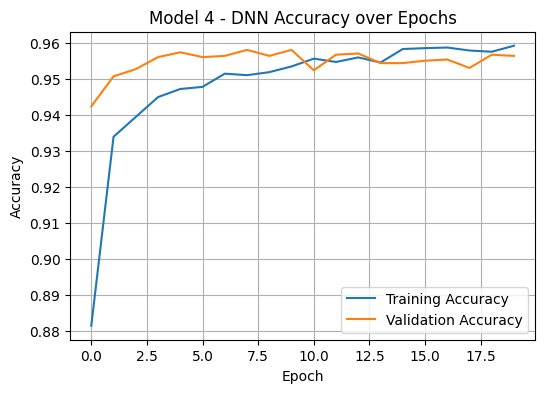

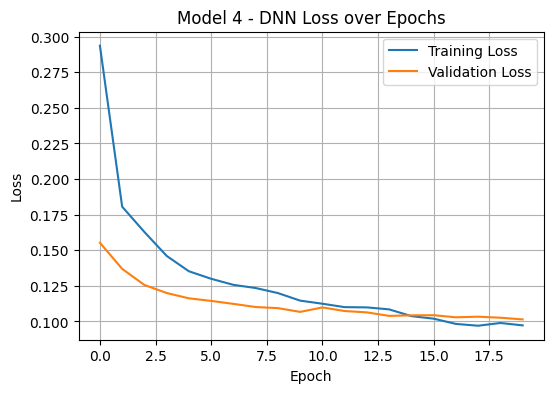

In [26]:
# Accuracy
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 4 - DNN Accuracy over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model 4 - DNN Loss over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

